In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train  = pd.read_csv("Data/train.csv")
test  = pd.read_csv("Data/test.csv")
stores  = pd.read_csv("Data/stores.csv")
features  = pd.read_csv("Data/features.csv")


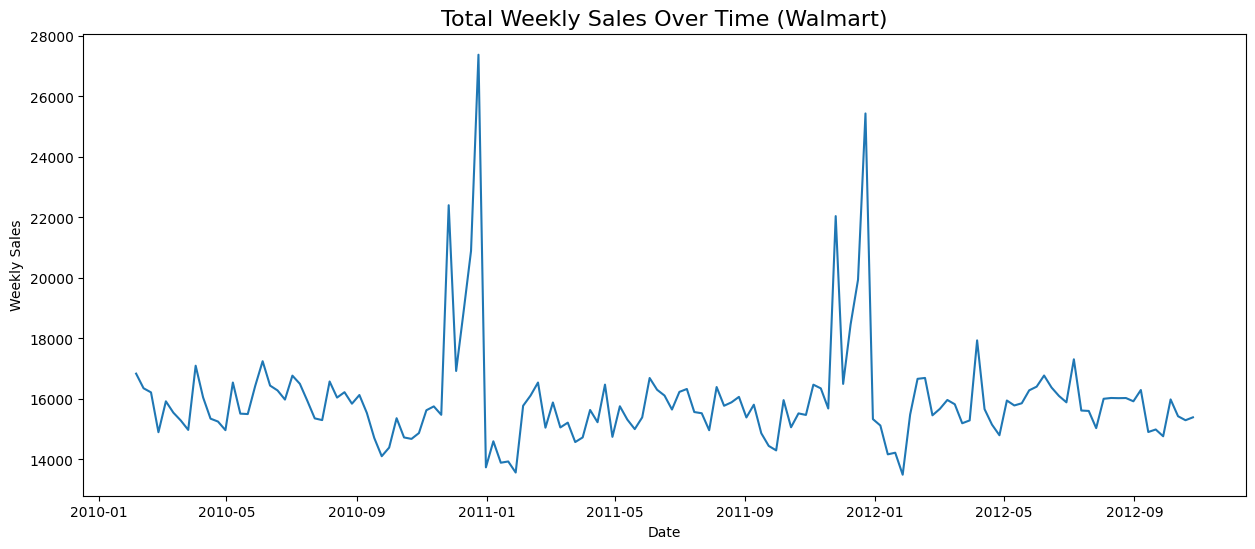

In [11]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

plt.figure(figsize=(15,6))
sns.lineplot(data=train, x='Date', y='Weekly_Sales', errorbar=None)
plt.title("Total Weekly Sales Over Time (Walmart)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()

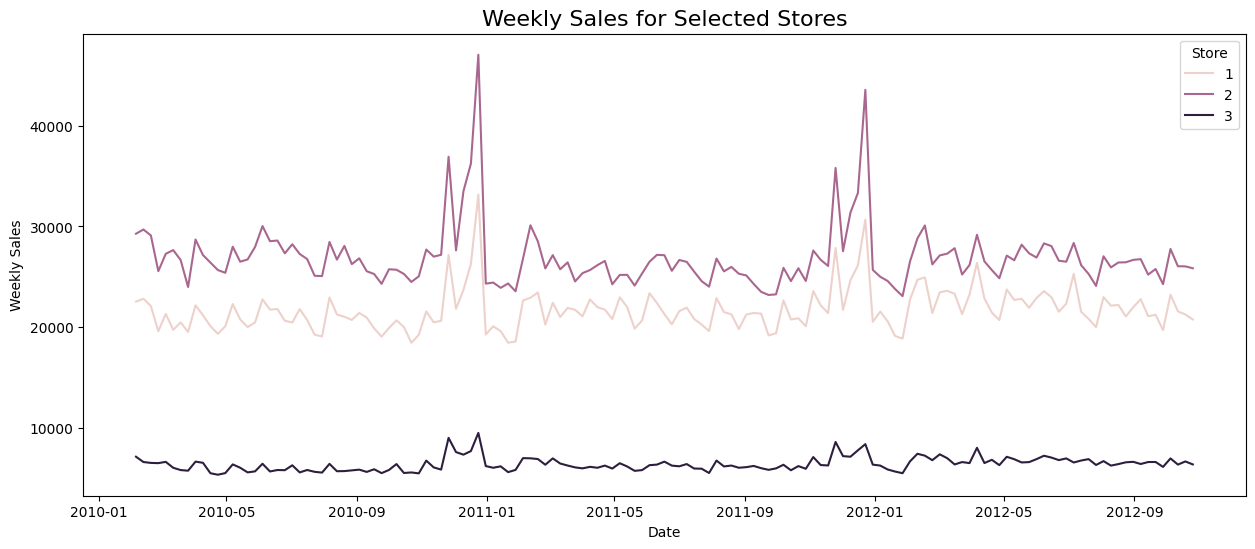

In [12]:

plt.figure(figsize=(15,6))
sns.lineplot(data=train[train['Store'].isin([1,2,3])], x='Date', y='Weekly_Sales', hue='Store', errorbar=None)
plt.title("Weekly Sales for Selected Stores", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend(title='Store')
plt.show()

In [13]:
for col in ["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]:
    features[col] = features[col].fillna(0)

features['CPI'] = features['CPI'].ffill()
features['Unemployment'] = features['Unemployment'].ffill()

print(features.isna().sum())


Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64


In [14]:
features['Date'] = pd.to_datetime(features['Date'])
NewTrain = pd.merge(train, stores, on='Store', how='left')
NewTrain = pd.merge(NewTrain, features, on=['Store', 'Date'], how='left')
NewTrain['IsHoliday'] = NewTrain['IsHoliday_x']
NewTrain = NewTrain.drop(columns=['IsHoliday_x', 'IsHoliday_y'])

print(NewTrain.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'],
      dtype='object')
